# Spectral Embeddings Tutorial
## Resources
* https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf
* http://www.math.utah.edu/~gustafso/s2017/2270/projects-2017/dylanJohnson/Dylan%20Johnson%20Graph%20Theory%20and%20Linear%20Algebra.pdf
* https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
* https://towardsdatascience.com/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe
* https://github.com/ciortanmadalina/high_noise_clustering/blob/master/spectral_clustering.ipynb
* https://arxiv.org/pdf/0711.0189.pdf
* https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
* https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [12]:
import numpy as np

import pandas as pd
# import scipy
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
# from sklearn.manifold import SpectralEmbedding

%config InlineBackend.figure_format = 'retina'

# 1. Similarity Matrix
Spectral embeddings are relatively straight forward, but we will provide a brief review to make sure we are all on the same page. To start, consider the idea of a [**similarity matrix**](https://en.wikipedia.org/wiki/Similarity_measure). Given a set of $x_1, \dots, x_n$ data points, a similarity matrix is an $[n x n]$ matrix containing pairwise similarities between data points. Consider the following 12 data points:

Text(0, 0.5, 'Height')

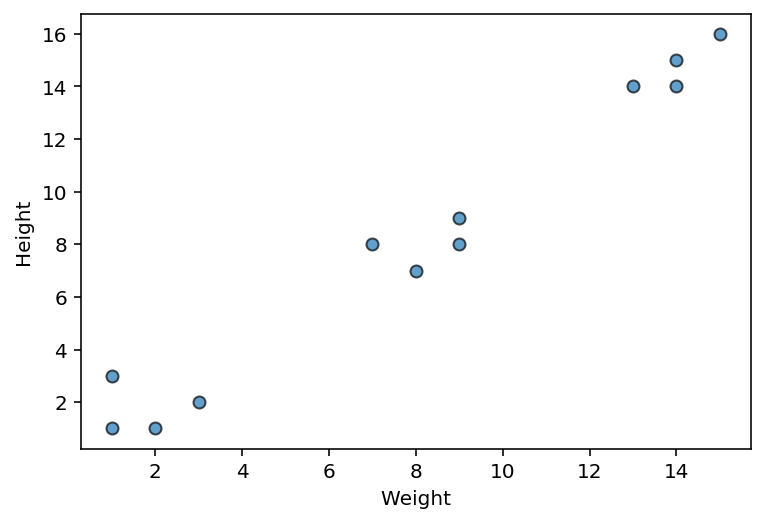

In [19]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])

plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='black')
plt.xlabel('Weight')
plt.ylabel('Height')

Based on these 12 data points, a basic similarity matrix could look like:

In [9]:
W = pairwise_distances(X, metric="euclidean")
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,2.236068,2.000000,2.236068,7.810250,9.433981,10.000000,8.062258,16.278821,17.029386,19.104973,17.691806
1,2.236068,0.000000,1.000000,1.414214,8.602325,9.899495,10.630146,8.485281,17.029386,17.691806,19.849433,18.439089
2,2.000000,1.000000,0.000000,2.236068,9.219544,10.630146,11.313708,9.219544,17.691806,18.384776,20.518285,19.104973
3,2.236068,1.414214,2.236068,0.000000,7.211103,8.485281,9.219544,7.071068,15.620499,16.278821,18.439089,17.029386
4,7.810250,8.602325,9.219544,7.211103,0.000000,2.000000,2.236068,1.414214,8.485281,9.219544,11.313708,9.899495
5,9.433981,9.899495,10.630146,8.485281,2.000000,0.000000,1.000000,1.414214,7.211103,7.810250,10.000000,8.602325
6,10.000000,10.630146,11.313708,9.219544,2.236068,1.000000,0.000000,2.236068,6.403124,7.071068,9.219544,7.810250
7,8.062258,8.485281,9.219544,7.071068,1.414214,1.414214,2.236068,0.000000,8.602325,9.219544,11.401754,10.000000
8,16.278821,17.029386,17.691806,15.620499,8.485281,7.211103,6.403124,8.602325,0.000000,1.000000,2.828427,1.414214
9,17.029386,17.691806,18.384776,16.278821,9.219544,7.810250,7.071068,9.219544,1.000000,0.000000,2.236068,1.000000


Note that the matrix is indeed symmetric. Additional information can be found in section 2 of this [article](https://arxiv.org/pdf/0711.0189.pdf).

# 2. Graph Notation: Adjacency Matrix, Degree Matrix, and Graph Laplacian Matrix
From this similarity matrix we can take many different approaches, but one route involves making use of graphs. Let us quickly look at the [**Adjacency Matrix**](https://en.wikipedia.org/wiki/Adjacency_matrix) and [**Degree Matrix**](https://en.wikipedia.org/wiki/Degree_matrix).

Consider the graph below:

In [13]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

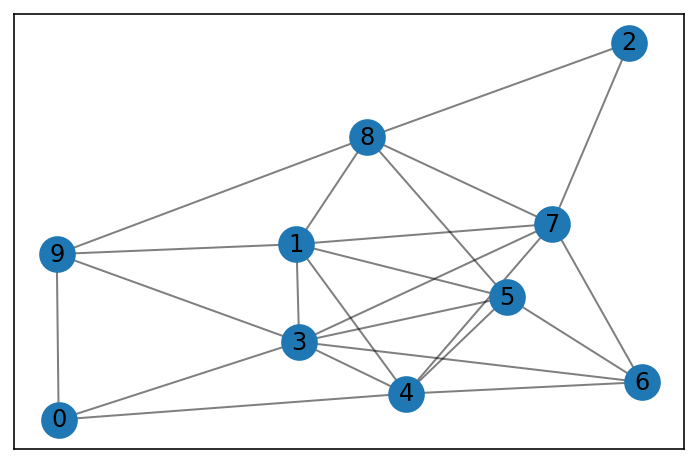

In [14]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)

The adjacency matrix of this graph, $A$, has a value of $1$ if $(i,j)$ is an edge, else it has a value of $0$. In the case of our graph above we have:

In [15]:
# W = nx.adjacency_matrix(G)
# print(W.todense())
A = pd.DataFrame(nx.to_numpy_matrix(G)).astype(int)
A

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,1,0,0,0,0,1
1,0,0,0,1,1,1,0,1,1,1
2,0,0,0,0,0,0,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1
4,1,1,0,1,0,1,1,1,0,0
5,0,1,0,1,1,0,1,0,1,0
6,0,0,0,1,1,1,0,1,0,0
7,0,1,1,1,1,0,1,0,1,0
8,0,1,1,0,0,1,0,1,0,1
9,1,1,0,1,0,0,0,0,1,0


Again, we can read this as a value of $1$ in a cell corresponds to an edge between the data point of row $i$ and column $j$. Mathematically we can write: 

$$A(i,j) =
\left\{
\begin{array}{ll}
1 \;\;\; \text{if edge between $i$ and $j$}\\
0 \;\;\; \text{otherwise}\\
\end{array}
\right.
$$

We can now consider the degree matrix. To start, the degree of a node is the number of edges that connect to it. So, a node with 3 edges connected would be degree 3. The degree matrix is an $[nxn]$ diagonal matrix where the value at entry $(i,i)$ is the degree of node $i$. For instance, in our graph we see that node $1$ has $5$ edges, and hence the value of $(1,1)$ in the degree matrix is $5$:

In [17]:
# D = np.diag(np.sum(np.array(W.todense()), axis=1))
# print('degree matrix:')
# print(D)

D = pd.DataFrame(np.diag(np.sum(A, axis=1)))
D

,0,1,2,3,4,5,6,7,8,9
0,3,0,0,0,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0
3,0,0,0,7,0,0,0,0,0,0
4,0,0,0,0,6,0,0,0,0,0
5,0,0,0,0,0,5,0,0,0,0
6,0,0,0,0,0,0,4,0,0,0
7,0,0,0,0,0,0,0,6,0,0
8,0,0,0,0,0,0,0,0,5,0
9,0,0,0,0,0,0,0,0,0,4


Mathematically we can define the degree of a vertex as:

$$d_i = \sum_{j=1}^n w_{ij}$$

And the degree matrix as:

$$D(i,j) =
\left\{
\begin{array}{ll}
d_i \;\;\; \text{if $i=j$}\\
0 \;\;\; \text{otherwise}\\
\end{array}
\right.
$$

#### Graph Laplacians
We finally arrive at the graph laplacian. From a computation perspective it is very straightforward; simply it is the degree matrix minus the adjacency matrix:

$$L = D - A$$

In [18]:
L = D - A
L

,0,1,2,3,4,5,6,7,8,9
0,3,0,0,-1,-1,0,0,0,0,-1
1,0,6,0,-1,-1,-1,0,-1,-1,-1
2,0,0,2,0,0,0,0,-1,-1,0
3,-1,-1,0,7,-1,-1,-1,-1,0,-1
4,-1,-1,0,-1,6,-1,-1,-1,0,0
5,0,-1,0,-1,-1,5,-1,0,-1,0
6,0,0,0,-1,-1,-1,4,-1,0,0
7,0,-1,-1,-1,-1,0,-1,6,-1,0
8,0,-1,-1,0,0,-1,0,-1,5,-1
9,-1,-1,0,-1,0,0,0,0,-1,4


# 3. Spectral Graph Theory

### 3.1 Intro and some notes
How can we think about this interesting relationship between graphs and matrices? Consider the image below:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/spectral_embeddings/graph_vs_adjacency_matrix.png" width='800'>

Intuitively it may seem like there is a way to partition our graph into two pieces such that the resulting pieces have low conductance! Note **conductance** is defined as:

> A measure of the connectivity of a group to the rest of the network relative to the density of the group (the number of edges that point outside the cluster divided by the sum of the degrees of the nodes in the cluster). The lower the conductance, the better the cluster.

Now, consider for a moment the following: What are the rows/columns in matrix adjacency matrix $A$? They are simply the nodes of the graph, or if we are looking at them in the context of $R^n$, they are simply the data points. Note that this can easily be a source of confusion. Recall our original 12 data points, $X = x_1, \dots, x_{12}$, defined in euclidean space:

Text(0, 0.5, 'Height')

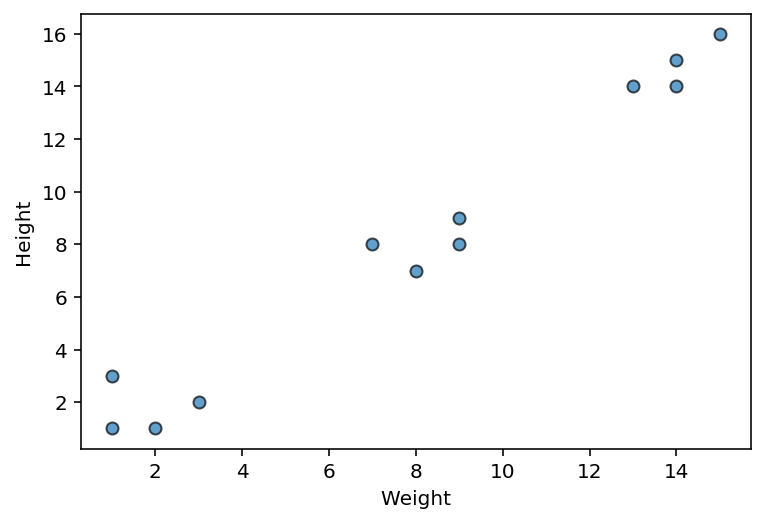

In [20]:
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='black')
plt.xlabel('Weight')
plt.ylabel('Height')

The above points are defined in $R^2$ and we see that there are in fact no edges present. However, seeing as they are defined in $R^2$ ([euclidean space](https://en.wikipedia.org/wiki/Euclidean_space)), we have access to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) function, from which we can compute a pairwise distance matrix (note that we could also use a [similarity measure](https://en.wikipedia.org/wiki/Similarity_measure) such as the [affinity matrix](https://www.sciencedirect.com/topics/computer-science/affinity-matrix). It may not seem necessary to calculate distance matrix, since while it will indeed preserve relative distances between data points, we lose their absolute location in space. However, it will provide us access to a different set of analytical tools going forward.

This distance matrix will have row and column indices that correspond to the actual data points, $X$. In other words, we have lost the actually dimensions (we no longer have access to height and weight), but the distances between all pairwise points in $X$ are preserved:

In [21]:
W = pairwise_distances(X, metric="euclidean")
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,2.236068,2.000000,2.236068,7.810250,9.433981,10.000000,8.062258,16.278821,17.029386,19.104973,17.691806
1,2.236068,0.000000,1.000000,1.414214,8.602325,9.899495,10.630146,8.485281,17.029386,17.691806,19.849433,18.439089
2,2.000000,1.000000,0.000000,2.236068,9.219544,10.630146,11.313708,9.219544,17.691806,18.384776,20.518285,19.104973
3,2.236068,1.414214,2.236068,0.000000,7.211103,8.485281,9.219544,7.071068,15.620499,16.278821,18.439089,17.029386
4,7.810250,8.602325,9.219544,7.211103,0.000000,2.000000,2.236068,1.414214,8.485281,9.219544,11.313708,9.899495
5,9.433981,9.899495,10.630146,8.485281,2.000000,0.000000,1.000000,1.414214,7.211103,7.810250,10.000000,8.602325
6,10.000000,10.630146,11.313708,9.219544,2.236068,1.000000,0.000000,2.236068,6.403124,7.071068,9.219544,7.810250
7,8.062258,8.485281,9.219544,7.071068,1.414214,1.414214,2.236068,0.000000,8.602325,9.219544,11.401754,10.000000
8,16.278821,17.029386,17.691806,15.620499,8.485281,7.211103,6.403124,8.602325,0.000000,1.000000,2.828427,1.414214
9,17.029386,17.691806,18.384776,16.278821,9.219544,7.810250,7.071068,9.219544,1.000000,0.000000,2.236068,1.000000


Now, how do we convert this into a graph? A simple way to handle this is to create a [neighborhood graph](https://arxiv.org/pdf/0711.0189.pdf) with a threshold of $\epsilon$. Say we let $\epsilon = 5$ in this case:

In [27]:
eps = 5
eps_neighborhood_W = pd.DataFrame((W < eps).astype(int))
eps_neighborhood_W.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1,0,0,0,0


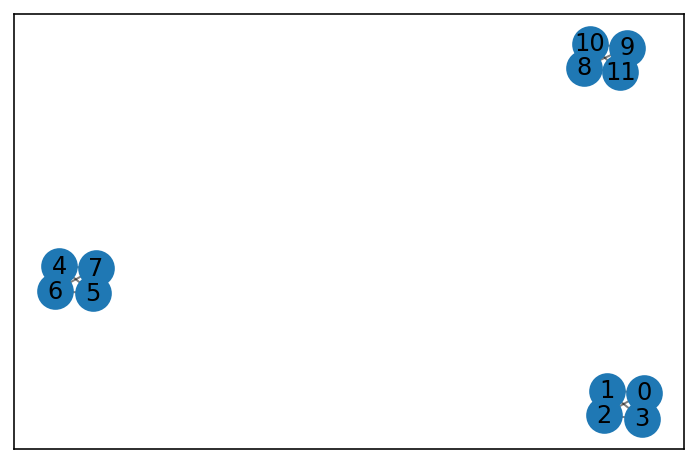

In [28]:
G = nx.Graph(eps_neighborhood_W)
draw_graph(G)

We see that to create an $\epsilon$ neighborhood graph, with $\epsilon = 5$, we simply needed to:
* Apply a threshold to the distance matrix, where pairs of points that have a distance (cell value) less than the threshold are given an edge (a value of $1$), while those that do not pass the threshold are given a value of $0$. 
* The result of this is an adjacency matrix which correspond to a graph that we can visualize.

### 3.2 What is the meaning of $Ax$?
Now, let us pose the question: Given an adjacency matrix, $A$, and a vector $X$, what is the meaning of $Ax$? To answer this, let us think above what each term represents. $A$ is our $[nxn]$ adjacency matrix, where each cell value is defined as:

$$a_{i,j} =
\left\{
\begin{array}{ll}
1 \;\;\; \text{if edge between $i$ and $j$}\\
0 \;\;\; \text{otherwise}\\
\end{array}
\right.
$$

$$
A = 
\begin{bmatrix}
a_{11} a_{12} \dots a_{1n} \\
\vdots  \\
a_{n1} a_{n2} \dots a_{nn}
\end{bmatrix}
$$

While $x$ is an $[nx1]$ vector, defined in the graph space; in other words, $x$ is a _node_, and each value of $x$ will determine whether it has an edge connected to a node at that index:

$$
x = 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots  \\
x_{n}
\end{bmatrix} = 
\begin{bmatrix}
0 \\
1 \\
\vdots  \\
1
\end{bmatrix}
$$

For instance, the $x$ above is a node that has _no edge_ to node $0$, but does have edges connecting it to node $2$ and node $n$. 

So, when thinking about the meaning of $Ax$:

$$
Ax = 
\begin{bmatrix}
a_{11} a_{12} \dots a_{1n} \\
\vdots  \\
a_{n1} a_{n2} \dots a_{nn}
\end{bmatrix} 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots  \\
x_{n}
\end{bmatrix} = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots  \\
y_{n}
\end{bmatrix}
$$

We can think about what a specific entry in the output vector $y$ would be:

$$y_i = \sum_{j=1}^n A_{ij}x_j = \sum_{(i,j) \in E} x_j$$

$$y_i = a_{i1}x_1 + \dots + a_{in}x_n$$

So, we see that for a particular $y_i$, it is simply the sum of the labels $x_j$ for all neighbors of $i$ (where a neighbor is a node connected via an edge). To get a better handle on this consider the example below:

In [29]:
eps_neighborhood_W

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1,0,0,0,0
5,0,0,0,0,1,1,1,1,0,0,0,0
6,0,0,0,0,1,1,1,1,0,0,0,0
7,0,0,0,0,1,1,1,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,1,1,1
9,0,0,0,0,0,0,0,0,1,1,1,1


In [30]:
x = np.array([0,0,0,0,1,1,1,1,0,0,0,0])

In [33]:
eps_neighborhood_W.dot(x)

0     0
1     0
2     0
3     0
4     4
5     4
6     4
7     4
8     0
9     0
10    0
11    0
dtype: int64

We see that above `x` was defined to have edges to nodes `[4,5,6,7]` and no other edges. Hence, the output shows large numbers (`4`) for those nodes, and zeros elsewhere. This should start to give a hint that $Ax$ allows us to capture the similarity between nodes. 

### 3.3 Spectral Graph Theory
Now our goal at this point is to analyze the [spectrum](https://en.wikipedia.org/wiki/Spectrum_of_a_matrix) (which is a set of eigenvectors ordered by their corresponding eigenvalue) of a matrix representing our graph $G$. For a moment let us consider the eigenvector/eigenvalue problem:

$$
Ax = 
\begin{bmatrix}
a_{11} a_{12} \dots a_{1n} \\
\vdots  \\
a_{n1} a_{n2} \dots a_{nn}
\end{bmatrix} 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots  \\
x_{n}
\end{bmatrix} = 
\lambda x 
$$
